In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from tuning_clf import model_fit, cv_report

In [45]:
df = pd.read_csv('data_extracted/cs-training-prepared.csv')
print('DataFrame shape: %d x %d' % (df.shape))

target_var = 'SeriousDlqin2yrs'

X = df.drop([target_var], axis=1).dropna(axis=1)
y = df[target_var]

DataFrame shape: 150000 x 13


In [46]:
rf = RandomForestClassifier(n_estimators=100, oob_score=False, random_state=83, n_jobs=4)


Model Report
AUC Score (Train): 0.999775
Log loss (Train): 0.043625
Accuracy (Train): 0.9985

Model Report
AUC Score (Train): 0.840525
Log loss (Train): 0.281210
Accuracy (Train): 0.9343


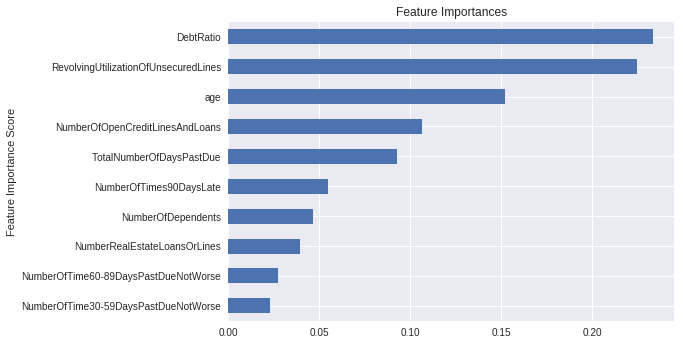

In [47]:
model_fit(rf, X, y, plot=True)

In [48]:
params_list = [{'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [5,10,50]},
               {'max_features': [3, 4, 5]}]

In [49]:
def tune_params(alg, params, scoring, cv=5, n_jobs=1, verbose=0):
    print("Tunning alg for params:", params)
    
    gsearch = GridSearchCV(alg, param_grid=params, scoring=scoring,
                           n_jobs=n_jobs, iid=False, cv=cv, verbose=verbose)
    
    gsearch.fit(X, y)
    
    cv_report(gsearch.cv_results_)
    
    return(gsearch)

In [50]:
alg = rf
scoring = 'roc_auc'
verbose = 1
cv = 3
n_jobs = 3

for params in params_list:
    gsearch = tune_params(alg, params, scoring, cv=cv, n_jobs=n_jobs, verbose=verbose)
    
    gsearch.fit(X, y)
    
    alg = gsearch.best_estimator_

('Tunning alg for params:', {'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [5, 10, 50]})
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.9min finished


Model with rank: 1
Mean validation score: 0.862 (std: 0.002)
Parameters: {'max_depth': 9, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.862 (std: 0.002)
Parameters: {'max_depth': 9, 'min_samples_leaf': 50}

Model with rank: 3
Mean validation score: 0.862 (std: 0.003)
Parameters: {'max_depth': 9, 'min_samples_leaf': 5}

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.7min finished


('Tunning alg for params:', {'max_features': [3, 4, 5]})
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:  1.1min finished


Model with rank: 1
Mean validation score: 0.862 (std: 0.002)
Parameters: {'max_features': 3}

Model with rank: 2
Mean validation score: 0.862 (std: 0.003)
Parameters: {'max_features': 4}

Model with rank: 3
Mean validation score: 0.861 (std: 0.003)
Parameters: {'max_features': 5}

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:  1.1min finished



Model Report
AUC Score (Train): 0.874735
Log loss (Train): 0.172273
Accuracy (Train): 0.9407

Model Report
AUC Score (Train): 0.859582
Log loss (Train): 0.177004
Accuracy (Train): 0.9379


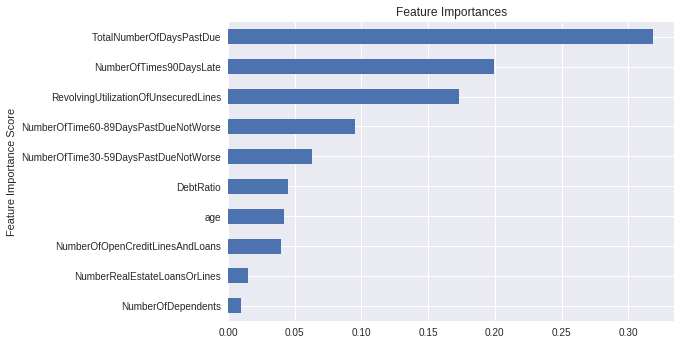

In [51]:
alg.learning_rate = 0.1
alg.n_estimators = 500

model_fit(alg, X, y, plot=True)

In [52]:
alg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=4, oob_score=False, random_state=83,
            verbose=0, warm_start=False)